In [108]:
import matplotlib as plt
import numpy as np
import pandas as pd
from pyquery import PyQuery as pq
import requests
import re
pd.set_option('display.max_rows', 500)
%matplotlib inline
plt.style.use('ggplot')

In [46]:
def get_content(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    result = requests.get(url, headers=headers)
    return result.content

In [ ]:
links = []
words = []
names = []
dates = []
spaces = re.compile("[\s.,:]+")
for page in ["http://waitbutwhy.com/archive","http://waitbutwhy.com/archive/page/2"]:
    p = pq(get_content(page))
    for post in p(".post-list li h5 a"):
        link = post.get("href")
        links.append(link)
        l = pq(get_content(link))
        text = l('.entry-content').text()
        footer = l('#social-ads').text()
        names.append(l('.entry-header h1').text())
        wordcount = len(spaces.findall(text))
        footercount = len(spaces.findall(footer))
        words.append(wordcount-footercount)
        dates.append(re.compile("/(20[0-9][0-9]/[0-9][0-9])/").search(link).group(1))

In [113]:
link = "http://waitbutwhy.com/2013/07/gods-wounded-ego.html"
l = pq(get_content(link))
text = l('.entry-content').text()
text

u'Facebook Twitter 23 Google+ 11 Pinterest 1 Related Wait But Why Posts How Religion Got in the Way A Religion for the Nonreligious Tweet !function (d, s, id) {\n\t\t\t\t\t\t\t\t\tvar js, fjs = d.getElementsByTagName(s)[0], p = /^http:/.test(d.location) ? \'http\' : \'https\';\n\t\t\t\t\t\t\t\t\tif (!d.getElementById(id)) {\n\t\t\t\t\t\t\t\t\t\tjs = d.createElement(s);\n\t\t\t\t\t\t\t\t\t\tjs.id = id;\n\t\t\t\t\t\t\t\t\t\tjs.src = p + \'://platform.twitter.com/widgets.js\';\n\t\t\t\t\t\t\t\t\t\tfjs.parentNode.insertBefore(js, fjs);\n\t\t\t\t\t\t\t\t\t}\n\t\t\t\t\t\t\t\t}(document, \'script\', \'twitter-wjs\'); (function () {\n\t\t\t\t\t\t\t\t\tvar po = document.createElement(\'script\');\n\t\t\t\t\t\t\t\t\tpo.type = \'text/javascript\';\n\t\t\t\t\t\t\t\t\tpo.async = true;\n\t\t\t\t\t\t\t\t\tpo.src = \'https://apis.google.com/js/platform.js\';\n\t\t\t\t\t\t\t\t\tvar s = document.getElementsByTagName(\'script\')[0];\n\t\t\t\t\t\t\t\t\ts.parentNode.insertBefore(po, s);\n\t\t\t\t\t\t\t\t})

In [77]:
months = ['{}/{}'.format(y,m if m>9 else '0{}'.format(m)) for y in range(2014,2017) for m in range(1,13)]
for month in months:
    links.append(None)
    names.append(None)
    dates.append(month)
    words.append(0)

In [112]:
posts = pd.DataFrame({"name":names,"words":words,"link":links,"date":dates})
posts[posts['words']!=0].sort_values(by='words',ascending=False)

,date,link,name,words
19,2015/06,http://waitbutwhy.com/2015/06/how-tesla-will-c...,How Tesla Will Change The World,27792
16,2015/11,http://waitbutwhy.com/2015/11/the-cook-and-the...,The Cook and the Chef: Musk’s Secret Sauce,21659
24,2015/01,http://waitbutwhy.com/2015/01/artificial-intel...,The AI Revolution: Our Immortality or Extinction,17295
9,2016/03,http://waitbutwhy.com/2016/03/cryonics.html,Why Cryonics Makes Sense,15502
8,2016/05,http://waitbutwhy.com/2016/05/mailbag-1.html,Mailbag #1,10886
62,2014/09,http://waitbutwhy.com/2014/09/muhammad-isis-ir...,From Muhammad to ISIS: Iraq’s Full Story,9733
38,2014/09,http://waitbutwhy.com/2014/09/muhammad-isis-ir...,From Muhammad to ISIS: Iraq’s Full Story,9733
17,2015/08,http://waitbutwhy.com/2015/08/how-and-why-spac...,How (and Why) SpaceX Will Colonize Mars,9149
33,2014/10,http://waitbutwhy.com/2014/10/religion-for-the...,Religion for the Nonreligious,8659
60,2014/10,http://waitbutwhy.com/2014/10/religion-for-the...,Religion for the Nonreligious,8659


In [110]:
monthly = posts.groupby('date').sum()
monthly

,words
date,
2013/07,14052
2013/08,8461
2013/09,11152
2013/10,13020
2013/11,7187
2013/12,14286
2014/01,5936
2014/02,17210
2014/03,6067


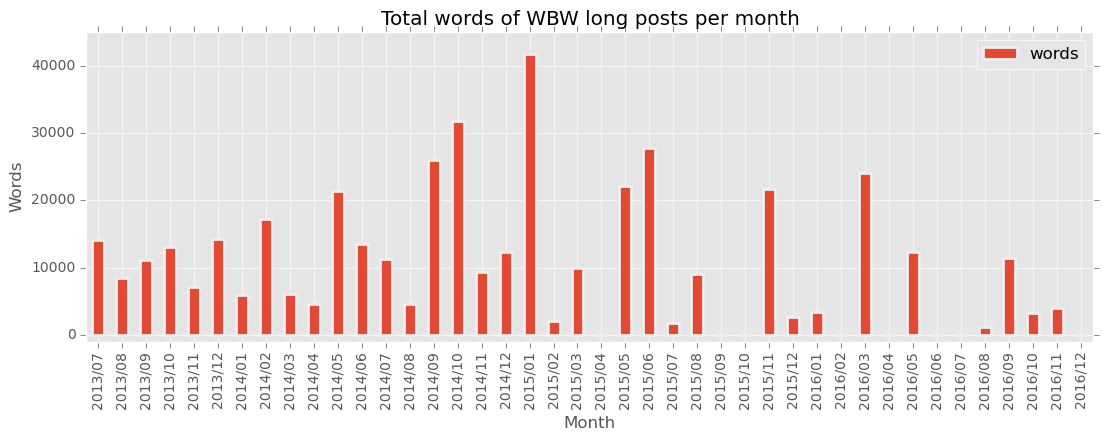

In [105]:
ax = monthly.plot(kind='bar',figsize=(13,4),title='Total words of WBW long posts per month',lw=2)
ax.set_ylim(-1000,45000)
ax.set_xlabel("Month")
ax.set_ylabel("Words")